# Mathieu Characteristic Values

Julia Code by Marcus Silva, based on MATLAB code by Dan Greenbaum

In [1]:
using PyPlot

In [14]:
""" 
Characteristicλ(ν,q,k)

Characteristic value λ_k for Mathieu's equation 

y'' + (λ_k - 2 q cos( 2z )) y = 0

where

ν ∈ ℝ  - reduced order (or characteristic exponent) of the Mathieu equation
q ∈ ℝ  - parameter
k      - TODO

"""
function Characteristicλ(nu_::Real, q::Real; k=1:5)
    @assert -1.0 < nu_ <= 1.0 "Reduced order must lie within (-1.0,1.0]"
    nu = rem(nu_+1,2)-1;
    
    # Set matrix size using formula from Shirts paper (1993), Eqs. (2.1)-(2.2).
    nu0 = nu + maximum(k);
    C = (8.46 + 0.444*nu0)/(1 + 0.085*nu0);
    D =  (0.24 + 0.0214*nu0)/(1 + 0.059*nu0);
    N = round(Int,ceil((nu0 + 2 + C*abs(q)^D)/2)); # matrix size is 2N+1
    
    d0 = (2*[-N:N;]-nu).^2;
    d1 = q*ones(2N);
    A = SymTridiagonal(d0,d1)
    a = eigvals(A,k)
    return a
end

""" 
CharacteristicA(q,k)

Characteristic value A_k for Mathieu's equation 

y'' + (A_k - 2 q cos( 2z )) y = 0

where

q ∈ ℝ  - parameter
k ∈    - non-negative integer index

"""
function CharacteristicA(q::Real; k=0:4)
    @assert all(k.>=0) "Indices must be non-negative integers."

    # Boolean indices of even and odd n values
    ie = map(iseven, k);
    io = !ie;

    a = Array(Float64,length(k));
    a[ie] = Characteristicλ(0.0,abs(q),k=k+1)[ie];
    if q>=0
        a[io] = Characteristicλ(1.0,q,k=k+1)[io]; 
    else
        if 0 in k # maybe not the cleanest way to do it
            a[io] = Characteristicλ(1.0,abs(q),k=k[2]:last(k))[io[2:end]]
        else
            a[io] = Characteristicλ(1.0,abs(q),k=k)[io]; 
        end
    end
    return a
end

""" 
CharacteristicB(q,k)

Characteristic value B_k for Mathieu's equation 

y'' + (B_k - 2 q cos( 2z )) y = 0

where

q ∈ ℝ  - parameter
k ∈    - positive interger index

"""
function CharacteristicB(q::Real; k=1:5)
    @assert all(k.>0) "Indices must be positive integers."
    # Boolean indices of even and odd n values
    ie = map(iseven, k);
    io = !ie;

    b = Array(Float64,length(k));
    b[ie] = Characteristicλ(0.0,q,k=k)[ie]; 
    if q>=0
        b[io] = Characteristicλ(1.0,q,k=k)[io];
    else
        b[io] = Characteristicλ(1.0,abs(q),k=k+1)[io]; 
    end

    return b
end


CharacteristicB (generic function with 2 methods)

Here are the characteristic values for positive and negative $q$, for various indices of $A$ and $B$.

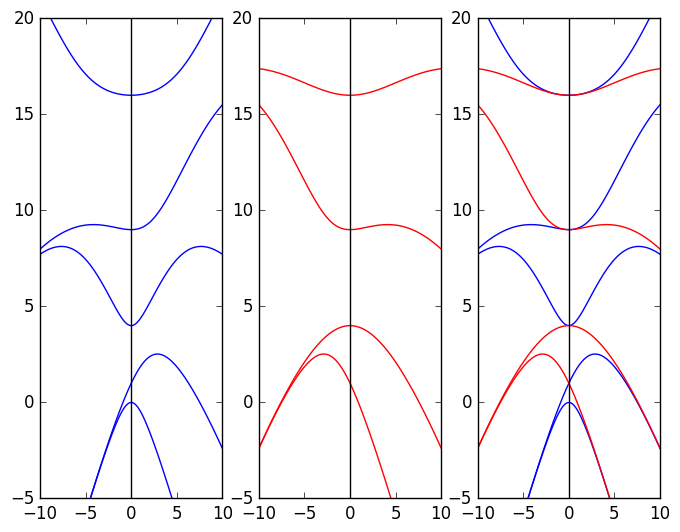

(-5,20)

In [15]:
qs = linspace(-10,10,100)

subplot(1,3,1)
plot(qs,[CharacteristicA(q,k=0:4) for q in qs],"b-") # a_0
axvline(x=0,color="k")
ylim(-5,20)

subplot(1,3,2)
plot(qs,[CharacteristicB(q,k=1:5) for q in qs],"r-") # a_0
axvline(x=0,color="k")
ylim(-5,20)

subplot(1,3,3)
plot(qs,[CharacteristicA(q,k=0:4) for q in qs],"b-") # a_0
plot(qs,[CharacteristicB(q,k=1:5) for q in qs],"r-") # a_0
axvline(x=0,color="k")
ylim(-5,20)


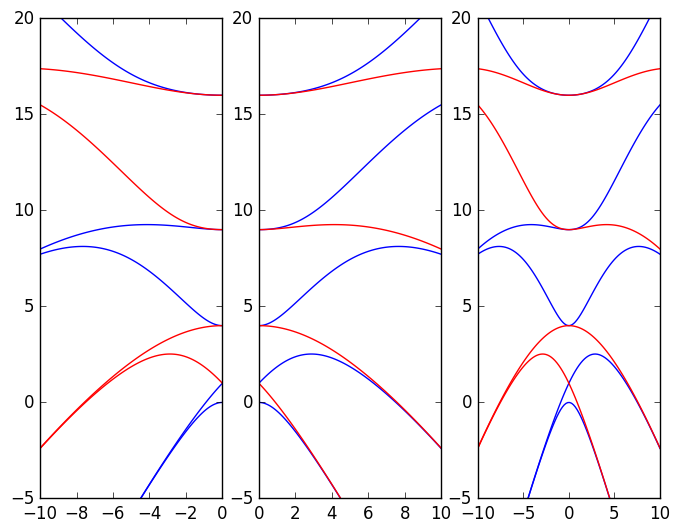

(-5,20)

In [16]:
qs = linspace(0,10,100)

subplot(1,3,1)
plot(-qs,[CharacteristicA(q,k=0:4) for q in -qs],"b-") # a_0
plot(-qs,[CharacteristicB(q,k=1:5) for q in -qs],"r-") # a_0
ylim(-5,20)

subplot(1,3,2)
plot(qs,[CharacteristicA(q,k=0:4) for q in qs],"b-") # a_0
plot(qs,[CharacteristicB(q,k=1:5) for q in qs],"r-") # a_0
ylim(-5,20)

subplot(1,3,3)
qs_pm = linspace(-10,10,100)
plot(qs_pm,[CharacteristicA(q,k=0:4) for q in qs_pm],"b-") # a_0
plot(qs_pm,[CharacteristicB(q,k=1:5) for q in qs_pm],"r-") # a_0
ylim(-5,20)

To double check, here are the $A$ and $B$ characteristic values writen as $\lambda$ characteristic values, compared to how they are computed by the various function (the two plots should be identical). For reference, see [DLMF @ NIST](http://dlmf.nist.gov/28.2.F1.mag)

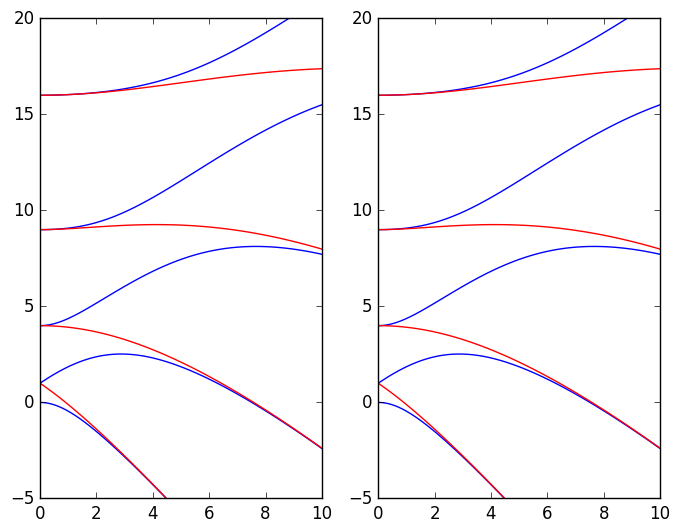

(-5,20)

In [9]:
qs = linspace(0,10,100)

subplot(1,2,1)
plot(qs,[Characteristicλ(0,q,k=1:1) for q in qs],"b-") # a_0
plot(qs,[Characteristicλ(1,q,k=2:2) for q in qs],"b-") # a_0
plot(qs,[Characteristicλ(0,q,k=3:3) for q in qs],"b-") # a_0
plot(qs,[Characteristicλ(1,q,k=4:4) for q in qs],"b-") # a_0
plot(qs,[Characteristicλ(0,q,k=5:5) for q in qs],"b-") # a_0

plot(qs,[Characteristicλ(1,q,k=1:1) for q in qs],"r-") # a_0
plot(qs,[Characteristicλ(0,q,k=2:2) for q in qs],"r-") # a_0
plot(qs,[Characteristicλ(1,q,k=3:3) for q in qs],"r-") # a_0
plot(qs,[Characteristicλ(0,q,k=4:4) for q in qs],"r-") # a_0
ylim(-5,20)

subplot(1,2,2)
plot(qs,[CharacteristicA(q,k=0:4) for q in qs],"b-") # a_0
plot(qs,[CharacteristicB(q,k=1:5) for q in qs],"r-") # a_0
ylim(-5,20)

With seems in good agreement with ![DTMF @ NIST](http://dlmf.nist.gov/28/2/F1.mag.png)

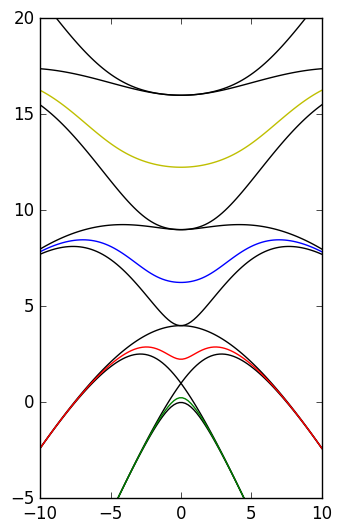

(-5,20)

In [7]:
qs = linspace(-10,10,100)

subplot(1,2,1)
plot(qs,[CharacteristicA(q,k=0:4) for q in qs],"k-") # a_k
plot(qs,[CharacteristicB(q,k=1:5) for q in qs],"k-") # b_k

plot(qs,[Characteristicλ(0.5,q,k=1:1) for q in qs],"g-")
plot(qs,[Characteristicλ(0.5,q,k=2:2) for q in qs],"r-")
plot(qs,[Characteristicλ(0.5,q,k=3:3) for q in qs],"b-")
plot(qs,[Characteristicλ(0.5,q,k=4:4) for q in qs],"y-")

ylim(-5,20)

The "real" test is the charge dependency of the spectrum

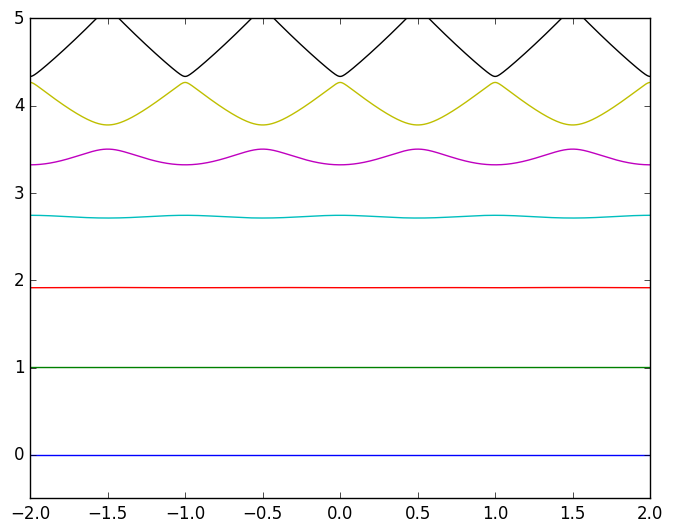

(-0.5,5)

In [8]:
EJoverEC = 30;
EC       = 1;#0.34; # GHz
nLevels  = 10;
nCharge  = 2;
nData    = 1001;

Nstart = 5;

q = -(1/2)*EJoverEC;
tol = 1e-12;

ng = linspace(-nCharge,nCharge,nData);
nu = -2*ng;

a = zeros(nData,nLevels);
N = zeros(nData,1);
Err = zeros(nData,1);
for i=1:nData
    a[i,:] = Characteristicλ(nu[i],q,k=1:nLevels);
end

E = EC*a;
Eng_half = Characteristicλ(-1,q,k=1:nLevels);
Eng_0    = Characteristicλ( 0,q,k=1:nLevels);
E01      = Eng_half[2] - Eng_half[1];

plot(ng,(E-Eng_0[1])/E01);
ylim(-.5,5)

In [17]:
pwd()

"/home/msilva/Repos"